In [1]:
import trimesh
import pybullet as p
import pybullet_data
import numpy as np
import time
import os
from caseloader import CaseLoader

global scale
scale = 0.1
p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, 0)

pybullet build time: Nov 11 2024 10:09:16


Version = 4.1 Metal - 89.3
Vendor = Apple
Renderer = Apple M3 Pro
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started


In [2]:
def get_color(value, exponent=1):
    # Normalize the value to the range [0, 1] (assuming input is between 0 and 25000)
    normalized_value = value / 25000
    
    # Clamp the normalized value between 0 and 1 to avoid out of range values
    
    # Apply the exponential curve to the red channel
    r = normalized_value ** exponent
    g = 1 - normalized_value ** exponent
    b = 1 - normalized_value ** exponent
    print([r, g, b, 1])
    return [r, g, b, 1]

In [3]:
data_folder = '/Users/bogdanmatache/Documents/GitHub/2024-25ab-fai3-specialisation-project-team-specifix-1/new_environment/data'

Centroid of points: [-0.07384781  0.47629942 -9.54197832]
Direction of trendline: [-0.11025957 -0.10115404  0.98874197]
95% coords: [-10.02677748  -8.65469108  79.7099502 ]


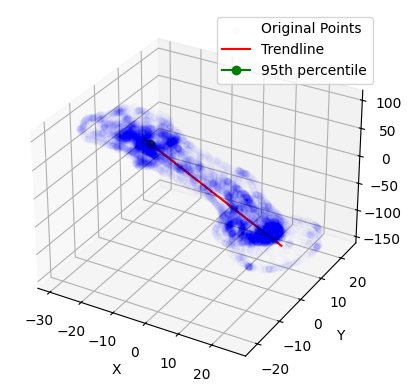

Centroid of points: [ -4.50713875   6.8240188  -18.11300824]
Direction of trendline: [-0.26456581  0.28475473 -0.92136837]
95% coords: [ 19.57701026 -19.09798295  65.76167469]


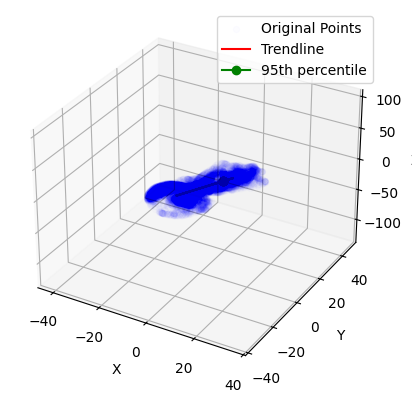

Centroid of points: [ -1.17438183   0.73258259 -10.43564694]
Direction of trendline: [-0.08198387 -0.09167837  0.99240804]
95% coords: [-7.5974392  -6.44999449 67.3149387 ]


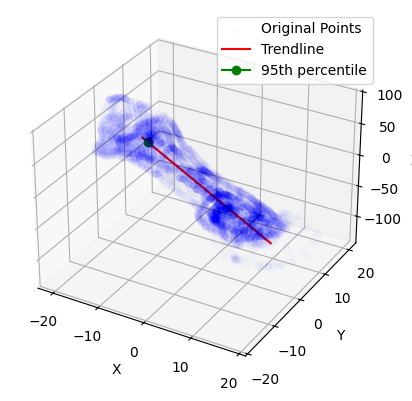

case1


In [4]:
case_ids = []
for case in os.listdir(data_folder):
    if ".DS_Store" not in case:
        case_ids.append(case)
        case = CaseLoader(os.path.join('/Users/bogdanmatache/Documents/GitHub/2024-25ab-fai3-specialisation-project-team-specifix-1/new_environment/', f"data/{case}"), True)


#chosen_case = np.random.choice(case_ids,1)[0]
chosen_case=case_ids[2]
print(chosen_case)

In [5]:
def load_and_spawn_fragment(fragment_path):
    global scale
    mesh_scale_true = [scale, scale, scale]
    if "shaft" in fragment_path:
        base_mass = 0
    else:
        base_mass = 0

    #tmesh_volume = trimesh.load(fragment_path).volume
    color = [np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1),1]

    visual_shape_id = p.createVisualShape(shapeType=p.GEOM_MESH,
                            fileName=fragment_path,
                            meshScale= mesh_scale_true,
                            rgbaColor=color)
    collision_shape_id = p.createCollisionShape(shapeType=p.GEOM_MESH,
                                                    fileName=fragment_path,
                                                    meshScale=mesh_scale_true)

    object_id = p.createMultiBody(baseMass=base_mass,
                                    baseCollisionShapeIndex=collision_shape_id,
                                    baseVisualShapeIndex=visual_shape_id,
                                    basePosition=[0,0,0])
    return object_id

In [6]:
fragment_ids = []
for filename in os.listdir(f'new_data/{chosen_case}'):
    if ".DS_Store" not in filename:
        print(filename)
        fragment_id = load_and_spawn_fragment(os.path.join(f'new_data/{chosen_case}',filename))
        fragment_ids.append(fragment_id)

frag_03_ground_truth.stl
shaft_ground_truth.stl
frag_06_ground_truth.stl
frag_05_ground_truth.stl
frag_04_ground_truth.stl


In [7]:
steps = 0
try:
    while steps <= 1000:
            p.stepSimulation()
            time.sleep(1.0 / 60.0)
            steps += 1
except KeyboardInterrupt:
    print("Simulation ended.")

p.disconnect()

2024-12-11 21:36:34.146 python[38584:1143077] +[IMKClient subclass]: chose IMKClient_Legacy
2024-12-11 21:36:34.146 python[38584:1143077] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
